In [1]:
import geopandas as gpd
import pandas as pd
import topojson as tp
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import csv
import folium

In [101]:
sf = gpd.read_file('C:/Users/Owen/Documents/Shapefiles/world-administrative-boundaries.shp')

In [102]:
sf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
sf.crs = "EPSG:4326"

In [104]:
#data = pd.read_csv('C:/Users/Owen/Documents/geonames-all-cities-with-a-population-1000_edit3.csv',on_bad_lines='skip')
cities = pd.read_csv('C:/Users/Owen/Documents/LatLong.csv')
cities = pd.DataFrame(cities, columns= ['Geoname ID','Lat','Long'])
cities


,Geoname ID,Lat,Long
0,1,23.7186,37.9169
1,2,32.8597,39.9334
2,3,32.8597,39.9334
3,4,32.8597,39.9334
4,5,32.8597,39.9334
...,...,...,...
239,240,-0.8339,51.4105
240,241,-0.8339,51.4105
241,242,-0.8339,51.4105
242,243,-1.0739,53.9614


In [114]:
geometry = [Point(xy) for xy in zip(cities['Lat'], cities['Long'])]
cities = GeoDataFrame(cities, geometry = geometry)
#cities.crs = "EPSG:4326"
cities.crs = "EPSG:3857"
#cities = cities.to_crs(sf.crs)
cities.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [115]:
cities

,Geoname ID,Lat,Long,geometry
0,1,23.7186,37.9169,POINT (23.719 37.917)
1,2,32.8597,39.9334,POINT (32.860 39.933)
2,3,32.8597,39.9334,POINT (32.860 39.933)
3,4,32.8597,39.9334,POINT (32.860 39.933)
4,5,32.8597,39.9334,POINT (32.860 39.933)
...,...,...,...,...
239,240,-0.8339,51.4105,POINT (-0.834 51.410)
240,241,-0.8339,51.4105,POINT (-0.834 51.410)
241,242,-0.8339,51.4105,POINT (-0.834 51.410)
242,243,-1.0739,53.9614,POINT (-1.074 53.961)


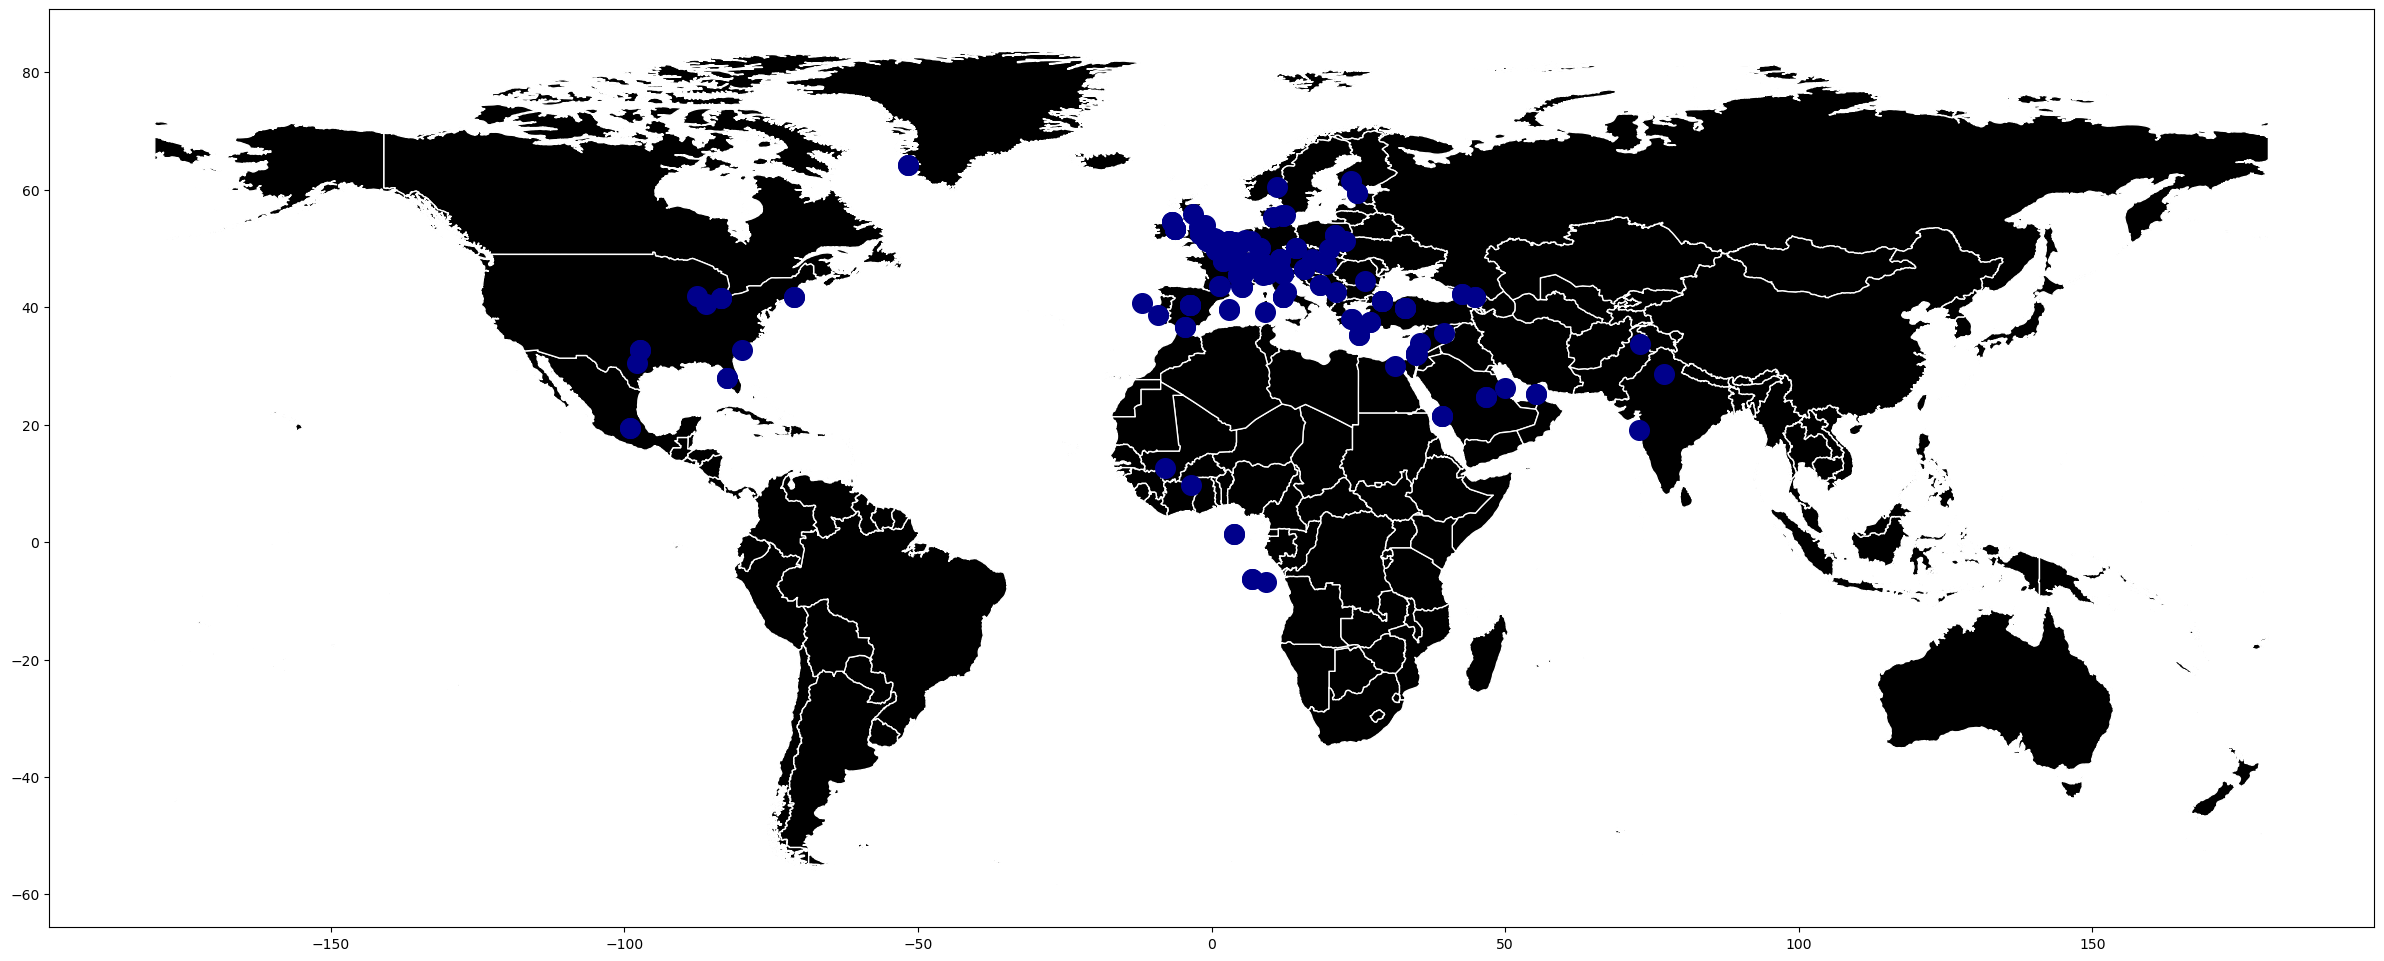

In [116]:
base = sf.plot(figsize=(30, 20), facecolor="black", edgecolor="white")
cities.plot(ax=base, marker='o', color='darkblue', markersize=200);



In [117]:
map = folium.Map(locaton = [0,0], tiles = "Stamen Toner", zoom_start = 1)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in cities.geometry ]

i=0
for coordinates in geo_df_list:
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Name: " + str(cities.Lat[i]),
                            icon = folium.Icon(icon="user", icon_color="white", color="darkblue", prefix="fa", angle=0,)))
    i = i + 1
map    